In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


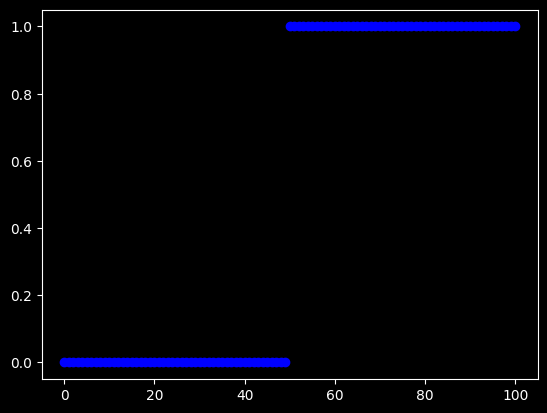

In [44]:
data = pd.read_csv('logistic_regression.csv')
plt.scatter(data.x, data.y, color='blue')
plt.show()

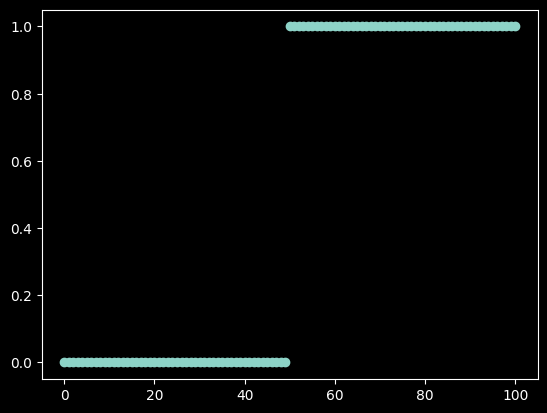

In [ ]:
X = np.array(data.x)
Y = np.array(data.y)
plt.scatter(X, Y)
plt.show()


In [46]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [47]:
def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return (1 / m) * X.T @ (h - y)


In [68]:
def gradient_descent(X, y, lr=0.01, iterations=50000):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.zeros(X_b.shape[1])

    for _ in range(iterations):
        grad = compute_gradient(X_b, y, theta)
        theta -= lr * grad

    return theta


In [69]:
def predict(X, theta, threshold=0.5):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    probs = sigmoid(X_b @ theta)
    return (probs >= threshold).astype(int)


In [70]:
theta = gradient_descent(X, Y)
preds = predict(X, theta)

accuracy = np.mean(preds == Y)
print('Theta:', theta)
print('Accuracy:', accuracy * 100, '%')


Theta: [-10.54102714   0.21608135]
Accuracy: 99.00990099009901 %


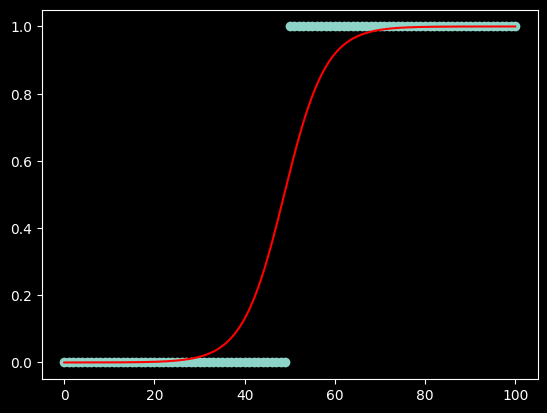

In [71]:
x_vals = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_b = np.c_[np.ones((x_vals.shape[0], 1)), x_vals]
y_vals = sigmoid(X_b @ theta)

plt.scatter(X, Y)
plt.plot(x_vals, y_vals, color='red')
plt.show()
